# Notebook of creating pandas Dataframe with possible features to train some Neural Network

In [2]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
example_features = pd.read_csv('../../datasets/fma/fma_metadata/features.csv')

C:\Users\szyme\AppData\Local\Temp\ipykernel_13012\3709863975.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

In [4]:
example_features.head()

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,...,tonnetz.39,tonnetz.40,tonnetz.41,zcr,zcr.1,zcr.2,zcr.3,zcr.4,zcr.5,zcr.6
0,statistics,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,kurtosis,...,std,std,std,kurtosis,max,mean,median,min,skew,std
1,number,01,02,03,04,05,06,07,08,09,...,04,05,06,01,01,01,01,01,01,01
2,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,7.1806526184e+00,5.2303090096e+00,2.4932080507e-01,1.3476201296e+00,1.4824777842e+00,5.3137123585e-01,1.4815930128e+00,2.6914546490e+00,8.6686819792e-01,...,5.4125156254e-02,1.2225749902e-02,1.2110591866e-02,5.7588901520e+00,4.5947265625e-01,8.5629448295e-02,7.1289062500e-02,0.0000000000e+00,2.0898721218e+00,6.1448108405e-02
4,3,1.8889633417e+00,7.6053929329e-01,3.4529656172e-01,2.2952005863e+00,1.6540306807e+00,6.7592434585e-02,1.3668476343e+00,1.0540937185e+00,1.0810308903e-01,...,6.3831120729e-02,1.4211839065e-02,1.7740072682e-02,2.8246941566e+00,4.6630859375e-01,8.4578499198e-02,6.3964843750e-02,0.0000000000e+00,1.7167237997e+00,6.9330163300e-02


In [65]:
for i in range(10):
    print(example_features.columns[i*50:(i+1)*50])

Index(['feature', 'chroma_cens', 'chroma_cens.1', 'chroma_cens.2',
       'chroma_cens.3', 'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6',
       'chroma_cens.7', 'chroma_cens.8', 'chroma_cens.9', 'chroma_cens.10',
       'chroma_cens.11', 'chroma_cens.12', 'chroma_cens.13', 'chroma_cens.14',
       'chroma_cens.15', 'chroma_cens.16', 'chroma_cens.17', 'chroma_cens.18',
       'chroma_cens.19', 'chroma_cens.20', 'chroma_cens.21', 'chroma_cens.22',
       'chroma_cens.23', 'chroma_cens.24', 'chroma_cens.25', 'chroma_cens.26',
       'chroma_cens.27', 'chroma_cens.28', 'chroma_cens.29', 'chroma_cens.30',
       'chroma_cens.31', 'chroma_cens.32', 'chroma_cens.33', 'chroma_cens.34',
       'chroma_cens.35', 'chroma_cens.36', 'chroma_cens.37', 'chroma_cens.38',
       'chroma_cens.39', 'chroma_cens.40', 'chroma_cens.41', 'chroma_cens.42',
       'chroma_cens.43', 'chroma_cens.44', 'chroma_cens.45', 'chroma_cens.46',
       'chroma_cens.47', 'chroma_cens.48'],
      dtype='object')
Index

# Possible Features
For every linear feature we can extend received information by calculating:
- mean
- std
- median
- min
- max

For 2d arrays we can calculate it by some axises. For example 12 times Chroma Features.

In [5]:
def calculate_futures(name, values):
    return

In [4]:
y, sr = librosa.load('../../datasets/fma/fma_small/Hip-Hop/000002.mp3')

## Chroma stft

In [6]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)
# np.mean(chroma_stft, axis=1)
# np.std(chroma_stft, axis=1)
np.median(chroma_stft, axis=1)
# np.min(chroma_stft, axis=1)
# np.max(chroma_stft, axis=1)

array([0.9196675 , 0.40637162, 0.29712954, 0.2745009 , 0.21831428,
       0.15204579, 0.19741958, 0.35440284, 0.29297513, 0.27465728,
       0.3117491 , 0.48450035], dtype=float32)

## Chroma cqt

In [7]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr, n_chroma=12)
# np.mean(chroma_cqt, axis=1)
# np.std(chroma_cqt, axis=1)
np.median(chroma_cqt, axis=1)
# np.min(chroma_cqt, axis=1)
# np.max(chroma_cqt, axis=1)

array([1.        , 0.6880701 , 0.64463836, 0.584162  , 0.61623794,
       0.6833725 , 0.5926604 , 0.5920069 , 0.46416956, 0.4784519 ,
       0.5086422 , 0.59332347], dtype=float32)

## Chroma cens

In [9]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
np.mean(chroma_cqt, axis=1)
# np.std(chroma_cqt, axis=1)
# np.median(chroma_cqt, axis=1)
# np.min(chroma_cqt, axis=1)
# np.max(chroma_cqt, axis=1)

array([0.95442134, 0.6741008 , 0.6360631 , 0.5646451 , 0.5884082 ,
       0.6486219 , 0.594884  , 0.5931008 , 0.4669653 , 0.48265433,
       0.5040411 , 0.5801074 ], dtype=float32)

## MFCC

In [10]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
np.mean(mfccs, axis=1)
# np.std(mfccs, axis=1)
# np.median(mfccs, axis=1)
# np.min(mfccs, axis=1)
# np.max(mfccs, axis=1)

array([-66.78069   ,  64.261795  ,  -9.776764  ,  11.287591  ,
        -2.4191437 ,   9.037897  ,  -1.1133189 ,   4.5498395 ,
        -5.305121  ,   0.24452747,  -9.495332  ,   2.5823383 ],
      dtype=float32)

## Rms

In [49]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
np.mean(rms, axis=1)
# np.std(rms, axis=1)
# np.median(rms, axis=1)
# np.min(rms, axis=1)
# np.max(rms, axis=1)

array([0.08595273], dtype=float32)

## Spectral centroid

In [12]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
np.mean(cent, axis=1)
# np.std(cent, axis=1)
# np.median(cent, axis=1)
# np.min(cent, axis=1)
# np.max(cent, axis=1)

array([3056.58789738])

## P’th-order spectral bandwidth

In [13]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
np.mean(spec_bw, axis=1)
# np.std(spec_bw, axis=1)
# np.median(spec_bw, axis=1)
# np.min(spec_bw, axis=1)
# np.max(spec_bw, axis=1)

array([2709.76590107])

## Spectral contrast

In [57]:
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
np.mean(contrast, axis=1)
# np.std(contrast, axis=1)
# np.median(contrast, axis=1)
# np.min(contrast, axis=1)
# np.max(contrast, axis=1)

array([16.03291377, 15.43139924, 17.92563632, 17.80908587, 17.89187475,
       17.15296558, 46.9735292 ])

## Spectral flatness

In [19]:
flatness = librosa.feature.spectral_flatness(y=y)
np.mean(flatness, axis=1)
# np.std(flatness, axis=1)
# np.median(flatness, axis=1)
# np.min(flatness, axis=1)
# np.max(flatness, axis=1)

array([0.0540469], dtype=float32)

## Spectral rolloff

In [20]:
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
np.mean(rolloff, axis=1)
# np.std(rolloff, axis=1)
# np.median(rolloff, axis=1)
# np.min(rolloff, axis=1)
# np.max(rolloff, axis=1)

array([6253.76925893])

## Poly coeff

In [58]:
S = np.abs(librosa.stft(y))
# p0 = librosa.feature.poly_features(S=S, order=0)
# p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(y=y, sr=sr, order=2)
np.mean(p2, axis=1)
# np.std(p2, axis=1)
# np.median(p2, axis=1)
# np.min(p2, axis=1)
# np.max(p2, axis=1)

array([ 9.33074864e-08, -1.43551938e-03,  5.83159660e+00])

## Tonal centroid

In [30]:
y_h = librosa.effects.harmonic(y)
tonnetz = librosa.feature.tonnetz(y=y_h, sr=sr)
np.mean(tonnetz, axis=1)
# np.std(tonnetz, axis=1)
# np.median(tonnetz, axis=1)
# np.min(tonnetz, axis=1)
# np.max(tonnetz, axis=1)

array([0.02824726, 0.15793834, 0.06010614, 0.15441794, 0.00796108,
       0.06129186])

## Zero crossing

In [31]:
zcr = librosa.feature.zero_crossing_rate(y)
np.mean(zcr, axis=1)
# np.std(zcr, axis=1)
# np.median(zcr, axis=1)
# np.min(zcr, axis=1)
# np.max(zcr, axis=1)

array([0.16440554])

## Tempo

In [77]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr)
tempo

array([161.49902344])

In [67]:
dtempo = librosa.feature.tempo(onset_envelope=onset_env, sr=sr,
                               aggregate=None)
np.mean(dtempo, axis=0)
# np.std(dtempo, axis=0)
# np.median(dtempo, axis=0)
# np.min(dtempo, axis=0)
# np.max(dtempo, axis=0)

def count_value_changes(arr):
    changes = 0
    for i in range(1, len(arr)):
        if arr[i] != arr[i - 1]:
            changes += 1
    return changes

count_value_changes(dtempo)

6

In [42]:
import scipy
prior_lognorm = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
dtempo_lognorm = librosa.feature.tempo(onset_envelope=onset_env, sr=sr,
                                       aggregate=None,
                                       prior=prior_lognorm)
np.mean(dtempo, axis=0)
# np.std(dtempo, axis=0)
# np.median(dtempo, axis=0)
# np.min(dtempo, axis=0)
# np.max(dtempo, axis=0)
count_value_changes(dtempo_lognorm)

9

## Onset strength

In [47]:
oenv = librosa.onset.onset_strength(y=y, sr=sr, hop_length=512)
np.mean(oenv, axis=0)
# np.std(oenv, axis=0)
# np.median(oenv, axis=0)
# np.min(oenv, axis=0)
# np.max(oenv, axis=0)

np.float32(1.8073685)

## Tempogram ratio

In [48]:
tempogram = librosa.feature.tempogram(y=y, sr=sr)
tgr = librosa.feature.tempogram_ratio(tg=tempogram, sr=sr)
np.mean(tgr, axis=1)
# np.std(tgr, axis=0)
# np.median(tgr, axis=0)
# np.min(tgr, axis=0)
# np.max(tgr, axis=0)

array([0.47411589, 0.51840293, 0.52948702, 0.53333046, 0.50992209,
       0.54039286, 0.72607298, 0.50661104, 0.51756228, 0.61323129,
       0.49852628, 0.45416775, 0.4092563 ])

## Onset

In [50]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
len(onset_frames)

151

## Tempo and Beat

In [54]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
len(beats)

82

## Predominant local pulse 

In [68]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)
np.mean(pulse, axis=0)
# np.std(pulse, axis=0)
# np.median(pulse, axis=0)
# np.min(pulse, axis=0)
# np.max(pulse, axis=0)

np.float32(0.30636173)

# Additional features
## Spectral Entropy
Spectral entropy measures the randomness in the distribution of power across different frequency bands and is often used to analyze the complexity of a sound signal.

In [17]:
def spectral_entropy(y, sr):
    psd = np.abs(librosa.stft(y)) ** 2
    psd_norm = psd / np.sum(psd)
    entropy = -np.sum(psd_norm * np.log2(psd_norm), axis=0)
    return entropy

spectral_entropy_value = spectral_entropy(y, sr)
np.mean(spectral_entropy_value, axis=0)
# np.std(spectral_entropy_value, axis=0)
# np.median(spectral_entropy_value, axis=0)
# np.min(spectral_entropy_value, axis=0)
# np.max(spectral_entropy_value, axis=0)

np.float32(0.0692536)

## Harmonic-Percussive Separation (HPS) Features
Separating the harmonic and percussive components of the audio can help distinguish between rhythmic (e.g., drums) and harmonic (e.g., guitar, vocals) elements in the music.

In [30]:
harmonic, percussive = librosa.effects.hpss(y)

harmonic_features = librosa.feature.mfcc(y=harmonic, sr=sr, n_mfcc=12)
percussive_features = librosa.feature.mfcc(y=percussive, sr=sr, n_mfcc=12)
percussive_features.shape
harmonic_features.shape
# plt.figure(figsize=(5, 5))
# plt.imshow(harmonic_features)
# plt.show()

(12, 1291)

## Modulation Features
Modulation features capture temporal changes in frequency content over time, which could be helpful for genre classification (e.g., fluctuations in rhythm or tempo).

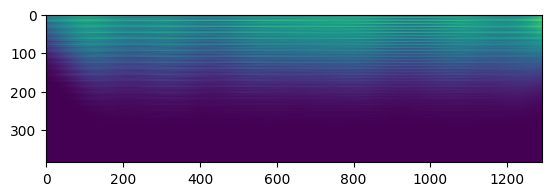

In [36]:
# mod_chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
mod_mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mod_features = librosa.feature.tempogram(y=y, sr=sr)
# mod_mel_spectrogram.shape
plt.imshow(mod_features)

## Rhythm Complexity
Rhythm complexity measures, like syncopation or groove characteristics, could add to your rhythm-related features. One approach is to use onset strength or beat features over longer periods of time to capture rhythmic complexity.

In [63]:
rhythm_complexity = np.std(librosa.feature.tempogram(y=y, sr=sr))
rhythm_complexity

np.float64(0.20253709324698987)

## Autocorrelation Features
Autocorrelation can help in understanding how periodic the signal is, which might help in genre classification, especially for rhythmic genres like electronic music.

In [42]:
autocorrelation = librosa.autocorrelate(y)
autocorrelation.shape

(660984,)

## Pitch Features
You can also extract features based on pitch, such as the pitch histogram or the average pitch over the duration of the song.

In [7]:
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)
pitch_mean = np.mean(pitches[pitches > 0])
pitch_std = np.std(pitches[pitches > 0])
# np.(pitches[pitches > 0])
pitches[pitches > 0].shape

(35700,)

## Spectral Flux
Spectral flux measures the rate of change in the power spectrum of the audio, which helps to distinguish between smooth and abrupt changes in the frequency content.

In [68]:
spectral_flux = librosa.onset.onset_strength(y=y, sr=sr)
spectral_flux.shape

(1291,)

## Tempo Variability
While you already calculate the tempo, you can also analyze the variability in tempo throughout the song (e.g., changes in speed or the "swing" in jazz).

In [76]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo_variability = np.std(librosa.feature.rhythm.tempo(onset_envelope=onset_env, sr=sr, aggregate=None))
tempo_variability

np.float64(27.85641302189574)

## Chord Features
Chord progression could be another distinguishing factor for certain genres. You could use a pre-trained chord recognition system or analyze harmonic transitions to capture genre-specific patterns.

In [47]:
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

## Energy Features (Low-Energy Rate)
Low-energy rate (LER) can help identify quieter or softer genres of music.

In [51]:
low_energy = np.sum(rms < 0.5 * np.mean(rms)) / len(rms)
low_energy

np.float64(256.0)

## Harmonic Ratio
Harmonic-to-noise ratio (HNR) captures the amount of noise versus harmonic content in the audio, and can help differentiate between more "noisy" genres like punk versus melodic genres.

In [53]:
harmonic_ratio = np.sum(harmonic) / (np.sum(percussive) + np.sum(harmonic))
harmonic_ratio

np.float32(0.54905176)

## Spectral Decrease
This feature measures the rate of decrease in spectral amplitudes, which can be indicative of certain timbral qualities.

In [83]:
def spectral_decrease(y, sr):
    S = np.abs(librosa.stft(y))
    decrease = np.mean(np.diff(S, axis=0), axis=1)
    return decrease

spectral_decrease_value = spectral_decrease(y, sr)
np.sum(spectral_decrease_value)

np.float32(-2.4102108)

# ADD
## Dynamic Range
Dynamic range measures the difference between the loudest and softest parts of the audio. Some genres, like classical music, tend to have wider dynamic ranges, while others, like pop or electronic music, tend to be more compressed.

In [84]:
dynamic_range = np.max(rms) - np.min(rms)

## Brightness
Timbre can be a distinguishing feature for genres as it describes the tone color or quality of the sound. You are already extracting some timbre-related features (e.g., MFCCs, spectral features), but you could explore additional high-level features such as:

Harmonic-to-Noise Ratio (HNR): As mentioned earlier, this can help distinguish "noisy" genres like punk or rock from cleaner ones like classical or jazz.
Brightness: This feature measures the amount of high-frequency energy relative to low-frequency energy, which might differentiate brighter genres (like EDM) from darker ones (like metal or doom).

In [85]:
brightness = np.mean(spectral_centroid)

NameError: name 'spectral_centroid' is not defined

## Swing Ratio
Swing is a rhythmical phenomenon common in jazz and some other genres where notes are played off-beat. Calculating a swing ratio can help differentiate jazz from other genres.

In [88]:
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

# Calculate durations of eighth-note pairs
swing_ratios = []
for i in range(1, len(onset_times)-1, 2):
    duration_1 = onset_times[i] - onset_times[i-1]
    duration_2 = onset_times[i+1] - onset_times[i]
    if duration_2 != 0:
        swing_ratio = duration_1 / duration_2
        swing_ratios.append(swing_ratio)

# Average swing ratio
avg_swing_ratio = np.mean(swing_ratios) if swing_ratios else 0
avg_swing_ratio

np.float64(1.1026739556739504)

## Syncopation
Syncopation refers to the emphasis on off-beats or unexpected rhythmic accents, which is common in genres like jazz, reggae, or hip-hop. While it’s harder to compute directly, rhythmic patterns from onset detection and beat tracking could help quantify syncopation.

In [89]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)

# Expected beat times
beat_times = librosa.frames_to_time(beats, sr=sr)

# Syncopation measure: compare actual onsets to expected beats
syncopation = 0
for onset in onset_times:
    closest_beat = min(beat_times, key=lambda x: abs(x - onset))
    syncopation += abs(onset - closest_beat)

# Normalize syncopation value
syncopation = syncopation / len(onset_times) if len(onset_times) else 0
syncopation

np.float64(0.07611839437761869)

## Tempo Stability
For genres like electronic dance music (EDM) or techno, where the tempo is generally stable, measuring the stability of the tempo could be useful.

In [86]:
tempo_stability = np.std(dtempo)

NameError: name 'dtempo' is not defined

## Roughness
Captures how "rough" a sound is, often associated with dissonance or harshness, which is more prevalent in genres like metal or punk.

In [90]:
harmonic = librosa.effects.harmonic(y=y)

# Short-time Fourier transform (STFT)
S = np.abs(librosa.stft(harmonic))

# Get frequency bins and magnitudes
frequencies = librosa.fft_frequencies(sr=sr)
magnitudes = np.mean(S, axis=1)

# Calculate roughness using Sethares' model (simplified)
roughness = 0
for i in range(len(frequencies) - 1):
    for j in range(i + 1, len(frequencies)):
        if abs(frequencies[i] - frequencies[j]) < 20:  # Close frequencies cause roughness
            roughness += magnitudes[i] * magnitudes[j] / abs(frequencies[i] - frequencies[j])
roughness

np.float64(114.32339096585092)

## Warmth
A perceptual feature describing the presence of low frequencies, common in genres like jazz or blues.

In [92]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to decibel scale (for perceptual purposes)
S_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Define a frequency threshold for low frequencies (e.g., 200 Hz)
low_freq_idx = np.where(librosa.mel_frequencies(n_mels=128, fmax=sr/2) < 200)[0]

# Warmth is the relative energy in the low-frequency range
warmth = np.mean(S_db[low_freq_idx, :]) / np.mean(S_db)
warmth

np.float32(0.7954911)